[nltk_data] Downloading package words to
[nltk_data]     C:\Users\X1\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Translation API returned and empty response.
Translation API returned and empty response.
Translation API returned the input string unchanged.
Translation API returned and empty response.
['Netral', 'Netral', 'Netral', 'Netral', 'positif', 'positif', 'Netral', 'positif', 'positif', 'Netral', 'Netral', 'Netral', 'Netral', 'positif', 'Netral', 'Netral', 'Netral', 'positif', 'positif', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'positif', 'Netral', 'Netral', 'Netral', 'positif', 'Netral', 'Netral', 'Negatif', 'Netral', 'positif', 'Netral', 'Negatif', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'Netral', 'positif', 'Netral', 'Netral', 'Netral', 'Netral', 'positif', 'Netral', 'Netral', 'positif']
tweet_poistif : (21.666666666666668 %)
tweet_netral : (75.0 %)
tweet_negatif : (3.3333333333333335 %)
        date                                              tweet Sentimen
0   2/3/2023         

C:\Users\X1\AppData\Local\Temp\ipykernel_19288\982479058.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Sentimen"]= tweet_hitung1


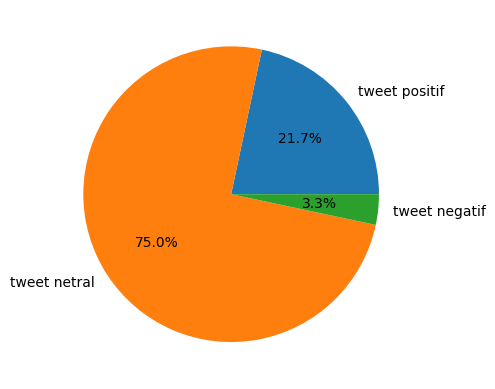

In [29]:
import pandas as pd
import re
import emoji
import nltk
from textblob import TextBlob
from googletrans import Translator
import matplotlib.pyplot as plt

nltk.download('words')
words = set(nltk.corpus.words.words())
df = pd.read_csv("Data_Lazada.csv")

dfuse = df.drop(df.columns[[0,1,2,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]], axis = 1)


def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",str(tweet)) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.EMOJI_DATA) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    tweet = re.sub(r'[^\w\s]', '', (tweet))
    
    return tweet
dfuse['tweet'] = dfuse['tweet'].map(lambda x: cleaner(x))


dfuse.to_csv("Data_Clean.csv")
df2 = dfuse.iloc[:60]

df3 = df2.to_dict("dict")
t = df3.get("tweet")

tweet_hitung1 = []
for value in t.values():
    tweet_prop = {}
    tweet_bersih = value

    analisis = TextBlob(tweet_bersih)
    try :
        analisis = analisis.translate(from_lang="id",to="en")
    except Exception as e :
        print(e)
    if analisis.sentiment.polarity > 0.0 :
        tweet_prop["Sentimen"] = "positif"
    elif analisis.sentiment.polarity == 0 :
        tweet_prop["Sentimen"] = "Netral"
    else :
        tweet_prop["Sentimen"] = "Negatif"
    for value in tweet_prop.values() :

        tweet_hitung1.append(value)

#tweet_hitung = list(tweet_prop.values())
print(tweet_hitung1)

tweet_positif = [i for i in tweet_hitung1 if i=="positif"]
print("tweet_poistif :","({} %)".format(len(tweet_positif)*100/ len(tweet_hitung1)))
tweet_netral = [i for i in tweet_hitung1 if i=="Netral"]
print("tweet_netral :","({} %)".format(len(tweet_netral)*100/ len(tweet_hitung1)))
tweet_negatif = [i for i in tweet_hitung1 if i=="Negatif"]
print("tweet_negatif :","({} %)".format(len(tweet_negatif)*100/ len(tweet_hitung1)))

df2["Sentimen"]= tweet_hitung1

print(df2)
"""def translate_to_english(text):
    text_blob = TextBlob(text)
    return str(text_blob.translate(to='en'))

translator = Translator()
df2.info()
df2['tweet'] = df2['tweet'].apply(lambda x: translator.translate(x, dest='en').text)"""

data_pie = [len(tweet_positif),len(tweet_netral),len(tweet_negatif)]



print(plt.pie(data_pie, labels=["tweet positif", "tweet netral", "tweet negatif"], autopct='%1.1f%%'))








In [28]:
textii = "Bonjour comment allez-vous?"

blob = TextBlob(textii)

# translate to English
translated_text = blob.translate(from_lang = "fr",to='en')
print(translated_text)

Good morning, how are you doing?
